# Exposures for Displacement Modelling

Currently, 3 types of exposures are available:
* Global Human Settlement Layer (GHSL)
* Aggregate building values (residential / no-residential) from the Building Exposure Model (BEM-res, BEM-nres)
* Sub-components leading to the BEM (BEM-subcomps)

The following sections illustrate all of the three options for Somalia.

**Note:** If you want to run these yourself, adjust the file paths in `exposure.py` manually. For more information, see the code documentation in the source code.

In [10]:
from climada.entity.exposures import Exposures
import numpy as np
import os

os.chdir('your-path-to/global-displacement-risk') # change back to root folder, not "~/doc"
import exposure

In [2]:
cntry_name = 'Somalia'

## GHSL

In [3]:
exp_ghsl = exposure.exp_from_ghsl(cntry_name)

2024-03-01 17:29:50,090 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/GHS_POP_E2020_GLOBE_R2023A_54009_1000_V1_0/GHS_POP_E2020_GLOBE_R2023A_54009_1000_V1_0.tif


<GeoAxes: >

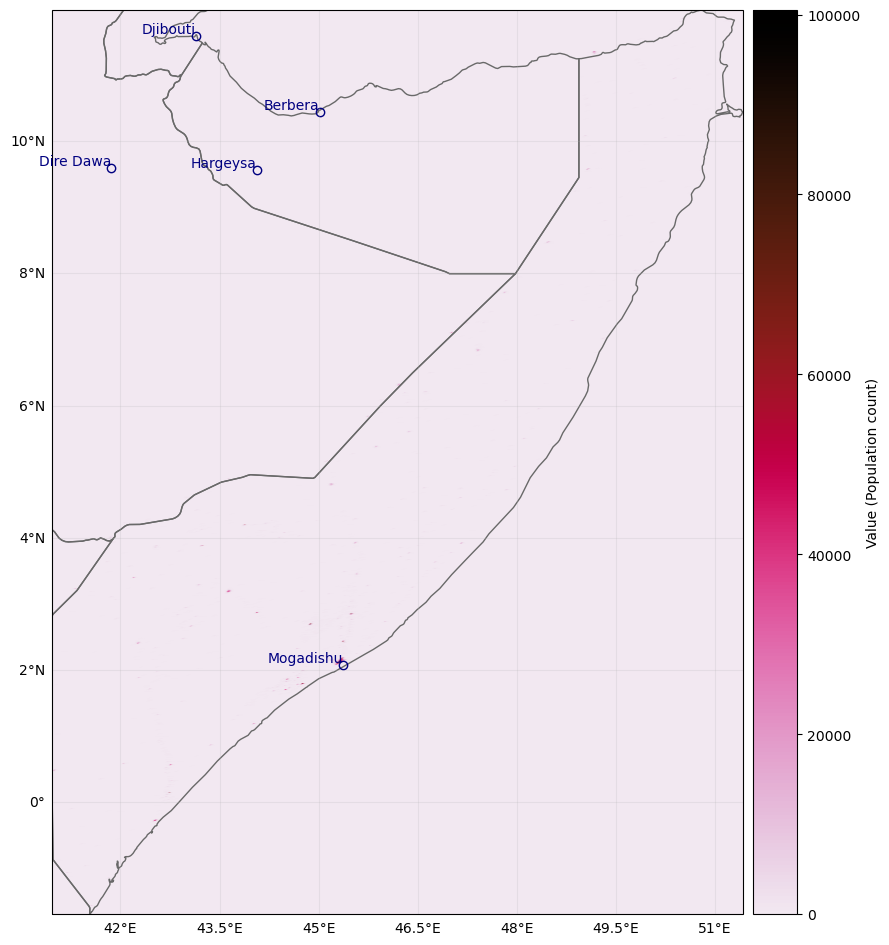

In [4]:
exp_ghsl.plot_scatter(adapt_fontsize=False)

## BEM-res / BEM-nres

In [5]:
exp_bem_res = exposure.exp_from_bem_res(cntry_name)
exp_bem_nres = exposure.exp_from_bem_nres(cntry_name)

2024-03-01 17:31:29,042 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/bem_global_raster/bem_1x1_valfis_res.tif
2024-03-01 17:31:31,555 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/bem_global_raster/bem_1x1_valfis_nres.tif


<GeoAxes: >

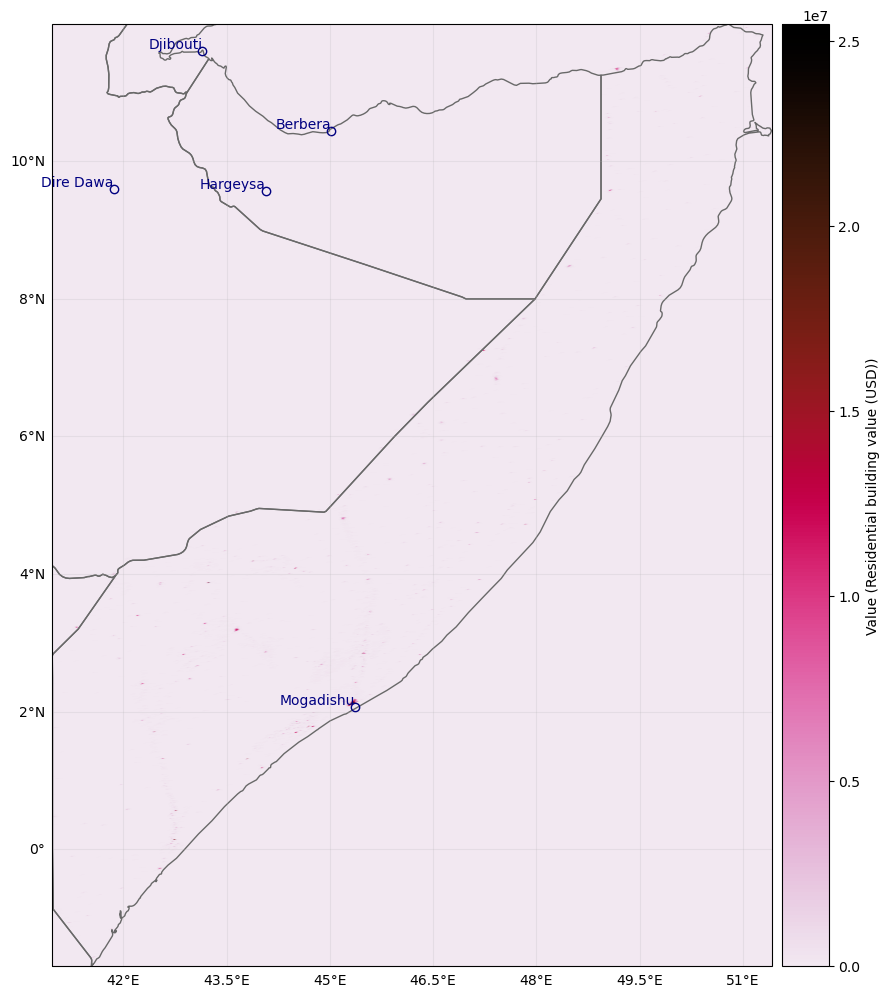

In [6]:
exp_bem_res.plot_scatter(adapt_fontsize=False)

<GeoAxes: >

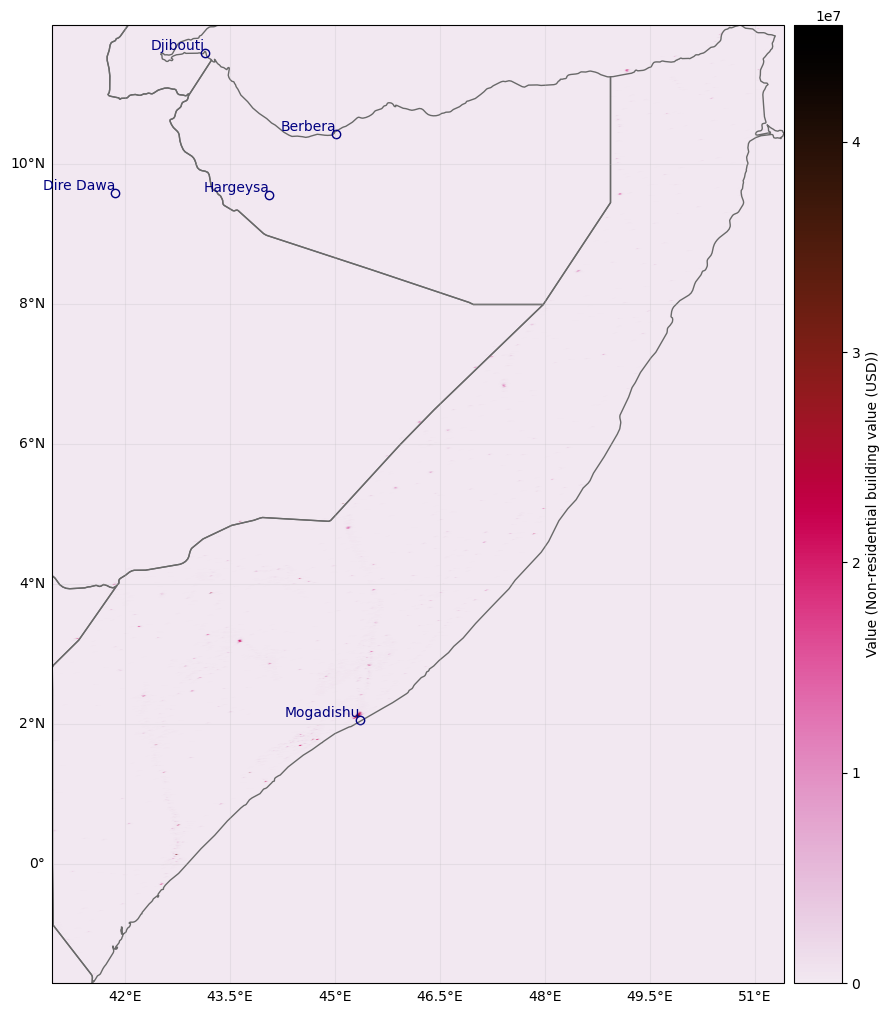

In [7]:
exp_bem_nres.plot_scatter(adapt_fontsize=False)

## BEM subcomponents

These are derived from country-wise `.csv` files.
The following functions load them into `GeoDataFrames`, adding coordinates from a separate file.

To convert them into formats usable as `Exposures()`, a few processing options are available (work in progress).

In [3]:
# Load the full dataframe, without further re-aggregation / processing other than adding centroids
gdf_bem_subcomps = exposure.gdf_from_bem_subcomps(cntry_name, opt='full')
gdf_bem_subcomps.head()

2024-03-01 17:36:30,239 - climada.util.coordinates - INFO - Reading /Users/evelynm/Documents/UNU_IDMC/data/exposure/grid_1x1_gid.tif


,id_1x,iso3,cpx,sector,se_seismo,valhum,valfis,bd_1_floor,bd_2_floor,bd_3_floor,geometry
0,174025676,SOM,3,beds_priv,W2,0.000342,5.179267e-07,100.0,0.0,0.0,POINT (50.54583 11.86250)
1,174025676,SOM,3,beds_priv,W1,0.000146,2.214579e-07,100.0,0.0,0.0,POINT (50.54583 11.86250)
2,174025676,SOM,3,beds_priv,UCB,0.000005,7.143810e-09,100.0,0.0,0.0,POINT (50.54583 11.86250)
3,174025676,SOM,3,beds_priv,RS2,0.000038,5.715046e-08,100.0,0.0,0.0,POINT (50.54583 11.86250)
4,174025676,SOM,3,beds_priv,INF,0.000014,2.143141e-08,100.0,0.0,0.0,POINT (50.54583 11.86250)


In [4]:
gdf_bem_subcomps.columns

Index(['id_1x', 'iso3', 'cpx', 'sector', 'se_seismo', 'valhum', 'valfis',
       'bd_1_floor', 'bd_2_floor', 'bd_3_floor', 'geometry'],
      dtype='object')

Info on the meaning of the columns can be found in the UNEP-GRID technical documentation and further references.

The centroids (id_1x / geometry) is multiply defined, each separate sector-se_seismo combo has its unique row.
A first option is to group the dataframe into single rows per centroid, performing some simple aggregations over the remaining columns (see code documentation - summing population, summing economic value, averaging building levels, getting the dominant sector and seismic building code per cell).

In [6]:
gdf_bem_subcomps_pergrid = exposure.gdf_from_bem_subcomps(cntry_name, opt='per_grid')
gdf_bem_subcomps_pergrid.head()

,valfis,valhum,cpx,bd_1_floor,bd_2_floor,bd_3_floor,geometry,se_seismo,sector
id_1x,,,,,,,,,
174014207,0.152284,125.009128,3.0,0.000,0.000,0.000,POINT (50.79583 11.97917),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."
174015812,0.156431,128.413502,3.0,67.881,25.497,6.622,POINT (50.75417 11.96250),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."
174016614,0.004673,3.836273,3.0,0.000,0.000,0.000,POINT (50.75417 11.95417),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."
174017411,0.035019,28.746637,3.0,100.000,0.000,0.000,POINT (50.72083 11.94583),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."
174017412,0.035019,28.746637,3.0,0.000,0.000,0.000,POINT (50.72917 11.94583),"[A, INF, RS2, UCB, W1, W2]","[beds_priv, beds_pub, edu_priv, edu_pub, emp_g..."


Various types of `Exposures()` can now be easily created form this. However, for Somalia lots of centroids are "missing" - unclear why atm.

<GeoAxes: >

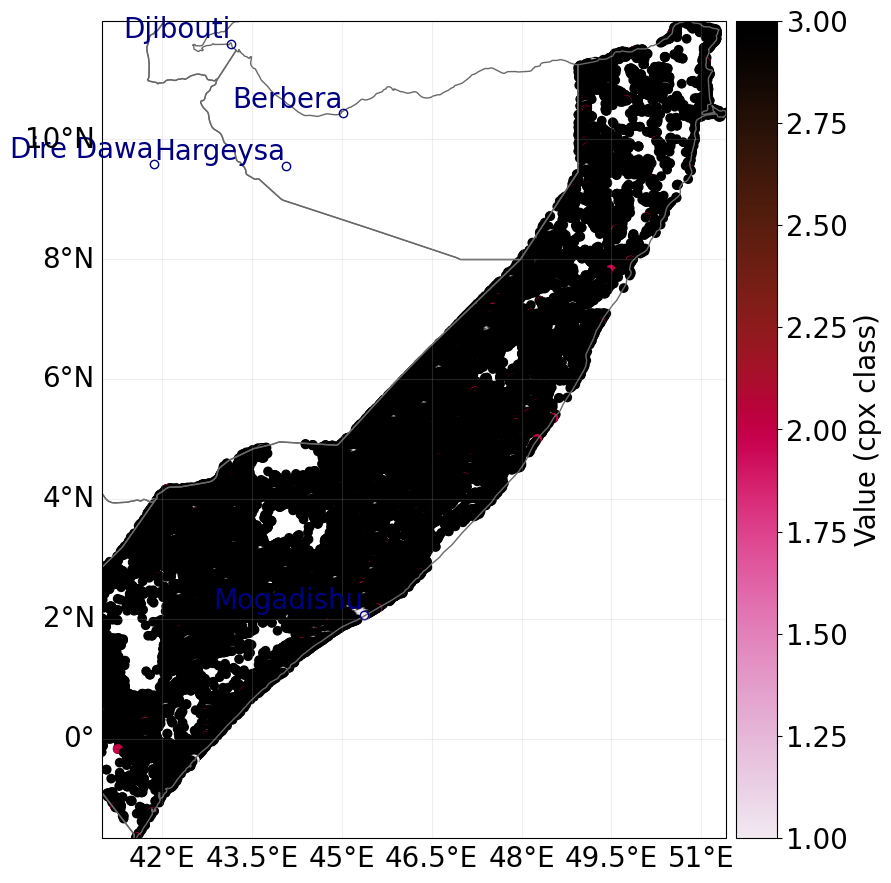

In [12]:
# Exposure where value is landuse type (cpx; 3=rural, 1=urban)
exp_cpx = Exposures(gdf_bem_subcomps_pergrid.copy())
exp_cpx.gdf.rename({'cpx': 'value'}, axis=1, inplace=True)
exp_cpx.value_unit = 'cpx class'
exp_cpx.gdf['longitude'] = exp_cpx.gdf.geometry.x
exp_cpx.gdf['latitude'] = exp_cpx.gdf.geometry.y
exp_cpx.gdf = exp_cpx.gdf[~np.isnan(
    exp_cpx.gdf.latitude)]  # drop nan centroids
exp_cpx.plot_scatter()


<GeoAxes: >

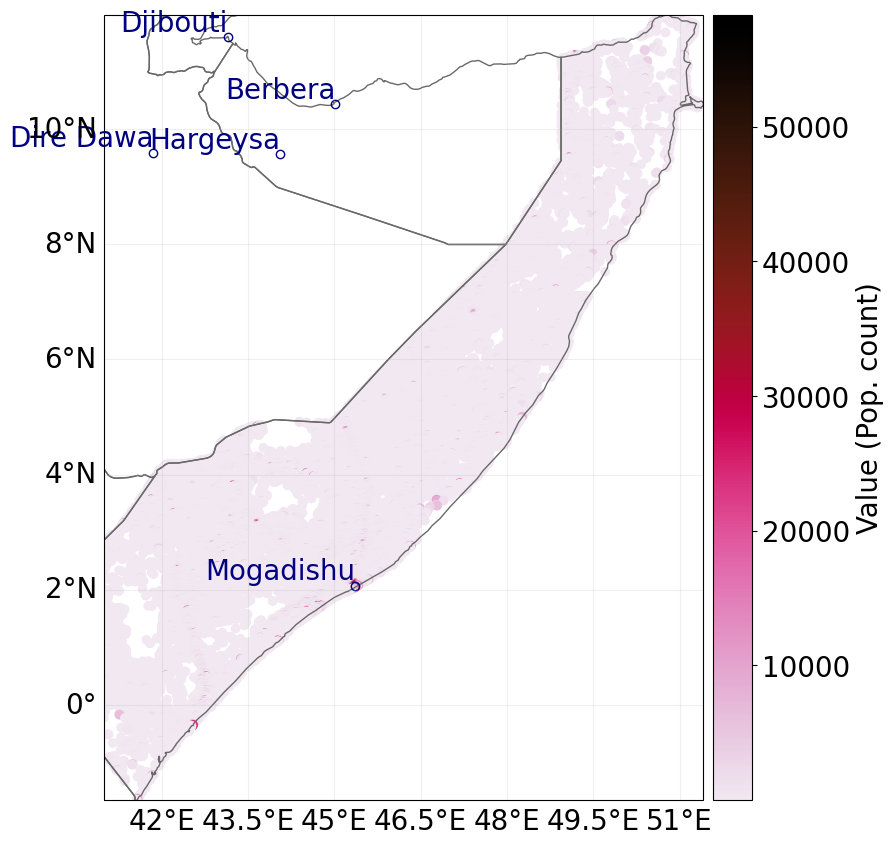

In [14]:
# Exposure where value is population count
exp_hum = Exposures(gdf_bem_subcomps_pergrid.copy())
exp_hum.gdf.rename({'valhum': 'value'}, axis=1, inplace=True)
exp_hum.value_unit = 'Pop. count'
exp_hum.gdf['longitude'] = exp_hum.gdf.geometry.x
exp_hum.gdf['latitude'] = exp_hum.gdf.geometry.y
exp_hum.gdf = exp_hum.gdf[~np.isnan(
    exp_hum.gdf.latitude)]  # drop nan centroids
exp_hum.plot_scatter()

<GeoAxes: >

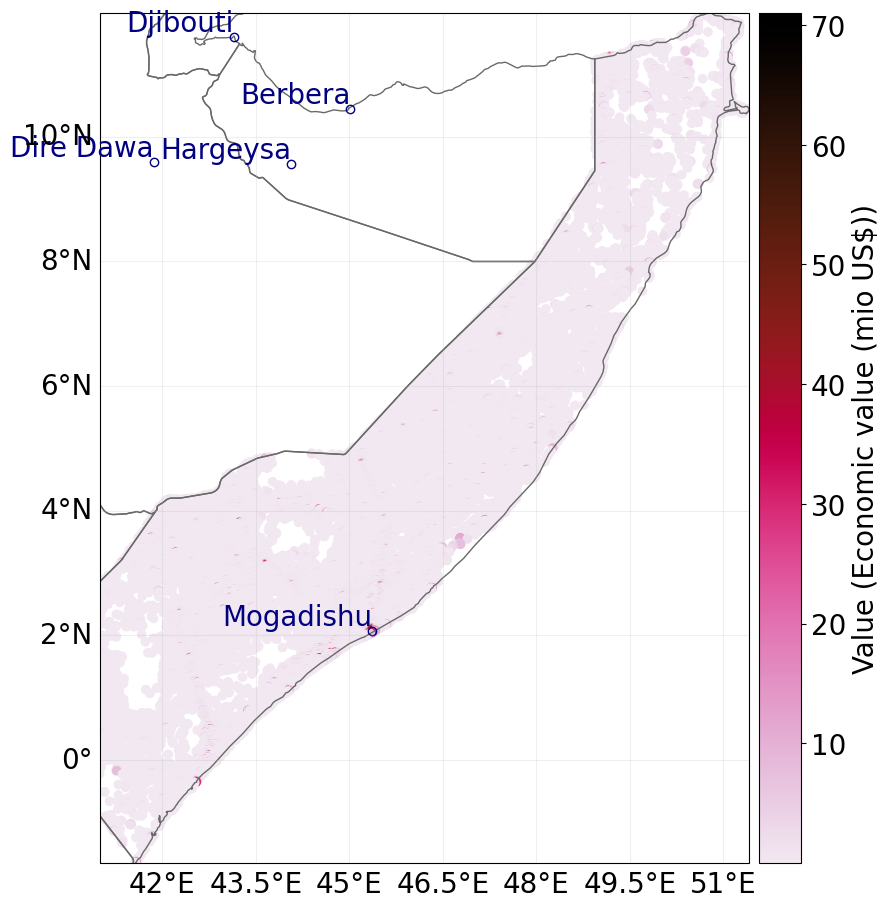

In [15]:
# Exposure where value is total economic value
exp_val = Exposures(gdf_bem_subcomps_pergrid.copy())
exp_val.gdf.rename({'valfis': 'value'}, axis=1, inplace=True)
exp_val.value_unit = 'Economic value (mio US$)'
exp_val.gdf['longitude'] = exp_val.gdf.geometry.x
exp_val.gdf['latitude'] = exp_val.gdf.geometry.y
exp_val.gdf = exp_val.gdf[~np.isnan(
    exp_val.gdf.latitude)]  # drop nan centroids
exp_val.plot_scatter()


**Outlook:**
Exposures with population per building code, sectors per building code (either one Exposure per building code, or multiply defined centroids, if possible).

In [ ]:


df_bem_parts['sector_se_seismo'] = df_bem_parts.sector + \
    '_'+df_bem_parts.se_seismo
df_bem_parts.pop('sector')
df_bem_parts.pop('se_seismo')

df_bem_parts_pivot = df_bem_parts.pivot(
    index=['id_1x'], columns='sector_se_seismo',
    values=['bs_value_r', 'bs_value_nr',
            'valhum', 'valfis', 'bd_1_floor', 'bd_2_floor', 'bd_3_floor'])
df_bem_parts_pivot['cpx'] = df_bem_parts.groupby('id_1x')['cpx'].mean()
# df_bem_parts_pivot.size/df_bem_parts.size =  0.9509977981176239
# del df_bem_parts